In [1]:
#installs
!pip install xlrd
!pip install uncertainties

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 1.5 MB/s eta 0:00:00


In [2]:
#imports
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
from numpy.ma.core import tan


In [10]:
m = ufloat(5.9,0.1)
D = ufloat(23.5,0.1)
x_0 = ufloat(0.151,0.001)
p_0 = ufloat(2.8,0.1)
Zeit = ufloat(7.0,0.1)

In [20]:

#Amblitude bestimmen
E_ges = 0.5*D*(x_0)**2+0.5*m*(p_0/m)**2
A= sqrt(2*E_ges/D)
omega= sqrt(D/m)
v_A = omega*A
phi = np.arcsin(0.535)
v_t = omega*A* cos(omega*Zeit+phi+math.pi/2)
print(E_ges)
print(A)
print(v_t)
print (v_A)

0.93+/-0.05
0.282+/-0.007
-0.52+/-0.05
0.562+/-0.017


In [ ]:
#definition constants
block_height = ufloat(1.575, 0.005)
angle_distance = ufloat(100, 2)
meanSpeed_Distance_unc = 0.5
meanSpeed_Time_unc = 0.0001
directSpeed_Distance_unc = 0.5
directSpeed_Velocity_unc = 0.3
angle = unp.sin(unp.arctan(block_height/angle_distance))
#Centerpoint = ufloat(115, 0.2)
Centerpoint = 115
#length_messurement = ufloat(12.5, 0.5)
length_messurement = 12.5
checkSpeed_unc = 0.56
impulse_mass_unc = 1
weight_cart = ufloat(196, impulse_mass_unc)
weight_cart_rubber = ufloat(206, impulse_mass_unc)
weight_cart_bumper = ufloat(207, impulse_mass_unc)
weight_cart_needle = ufloat(206, impulse_mass_unc)
weight_cart_wax = ufloat(206, impulse_mass_unc)
Friction_coeficiant = 1.5

In [ ]:
#read Data
df = pd.read_excel('meanSpeed.xlsx')
df2 = pd.read_excel('checkSpeed.xlsx')
df3 = pd.read_excel('directSpeed.xlsx')
df4 = pd.read_excel('impulse.xlsx')

meanSpeed = np.array([])
checkSpeed = np.array([])
directSpeed = np.array([])
impulse = np.array([])
meanSpeed = df.to_numpy()
checkSpeed = df2.to_numpy()
directSpeed = df3.to_numpy()
impulse = df4.to_numpy()

print(meanSpeed)

def arrayToUarray(array, rows, constant_uncertainty_array):
  new_array = unp.uarray([array[:,0], constant_uncertainty_array[0]])
  if rows > 1:
    new_array2 = unp.uarray([array[:,1], constant_uncertainty_array[1]])
    if rows > 2:
      new_array3 = unp.uarray([array[:,2], constant_uncertainty_array[2]])
      if rows > 3:
        new_array4 = unp.uarray([array[:,3], constant_uncertainty_array[3]])
        if rows > 4:
          new_array5 = unp.uarray([array[:,4], constant_uncertainty_array[4]])
          if rows > 5:
            new_array6 = unp.uarray([array[:,5], constant_uncertainty_array[5]])
  if rows == 1: combined = np.vstack((new_array)).T
  if rows == 2: combined = np.vstack((new_array, new_array2)).T
  if rows == 3: combined = np.vstack((new_array, new_array2, new_array3)).T
  if rows == 4: combined = np.vstack((new_array, new_array2, new_array3, new_array4)).T
  if rows ==  5: combined = np.vstack((new_array, new_array2, new_array3, new_array4, new_array5)).T
  if rows ==  6: combined = np.vstack((new_array, new_array2, new_array3, new_array4, new_array5, new_array6)).T
  return combined

meanSpeed_unc_array = np.array([meanSpeed_Distance_unc, meanSpeed_Time_unc])
uMeanSpeed = arrayToUarray(meanSpeed, 2, meanSpeed_unc_array)

#checkSpeed_unc = np.std(checkSpeed)
checkSpeed_unc_array = np.array([checkSpeed_unc])
uCheckSpeed = arrayToUarray(checkSpeed, 1, checkSpeed_unc_array)


directSpeed_unc_array = np.array([0, 0, directSpeed_Distance_unc, directSpeed_Velocity_unc, directSpeed_Velocity_unc])
uDirectSpeed = arrayToUarray(directSpeed, 5, directSpeed_unc_array)


impulse_unc_array = np.array([directSpeed_Velocity_unc, directSpeed_Velocity_unc, directSpeed_Velocity_unc, directSpeed_Velocity_unc, impulse_mass_unc])
uImpulse = arrayToUarray(impulse, 5, impulse_unc_array)

print(uMeanSpeed)


[[140.       2.8057]
 [140.       2.8059]
 [140.       2.8061]
 [140.       2.8076]
 [140.       2.8095]
 [120.       2.3451]
 [120.       2.3444]
 [120.       2.3462]
 [120.       2.3463]
 [120.       2.3438]
 [100.       1.9218]
 [100.       1.9237]
 [100.       1.9225]
 [100.       1.9218]
 [100.       1.9229]
 [ 80.       1.5203]
 [ 80.       1.5229]
 [ 80.       1.5207]
 [ 80.       1.523 ]
 [ 80.       1.5229]
 [ 60.       1.1325]
 [ 60.       1.132 ]
 [ 60.       1.131 ]
 [ 60.       1.1324]
 [ 60.       1.1319]
 [ 40.       0.7568]
 [ 40.       0.7573]
 [ 40.       0.7564]
 [ 40.       0.7567]
 [ 40.       0.7573]
 [ 20.       0.3829]
 [ 20.       0.3848]
 [ 20.       0.3834]
 [ 20.       0.3822]
 [ 20.       0.3824]]
[[140.0+/-0.5 2.8057+/-0.0001]
 [140.0+/-0.5 2.8059+/-0.0001]
 [140.0+/-0.5 2.8061+/-0.0001]
 [140.0+/-0.5 2.8076+/-0.0001]
 [140.0+/-0.5 2.8095+/-0.0001]
 [120.0+/-0.5 2.3451+/-0.0001]
 [120.0+/-0.5 2.3444+/-0.0001]
 [120.0+/-0.5 2.3462+/-0.0001]
 [120.0+/-0.5 2.

<ipython-input-21-719238ca0e34>:19: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  new_array = unp.uarray([array[:,0], constant_uncertainty_array[0]])
<ipython-input-21-719238ca0e34>:21: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  new_array2 = unp.uarray([array[:,1], constant_uncertainty_array[1]])
<ipython-input-21-719238ca0e34>:23: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  new_array3 = unp.uarray([array[:,2], constant_uncertainty_array[2]])
<ipython-input-21-719238ca0e34>:25: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirecto

In [ ]:
#Calculate Velocity for MeanSpeed

append_array = np.array([])
for i in range(len(uMeanSpeed)):
  append_array = np.append(append_array, uMeanSpeed[i,0]/uMeanSpeed[i,1])

uMeanSpeed = np.concatenate((uMeanSpeed,append_array[:,None]),axis=1)

y = 0.05089 * x + -0.00044 * x^2 + 51.43782




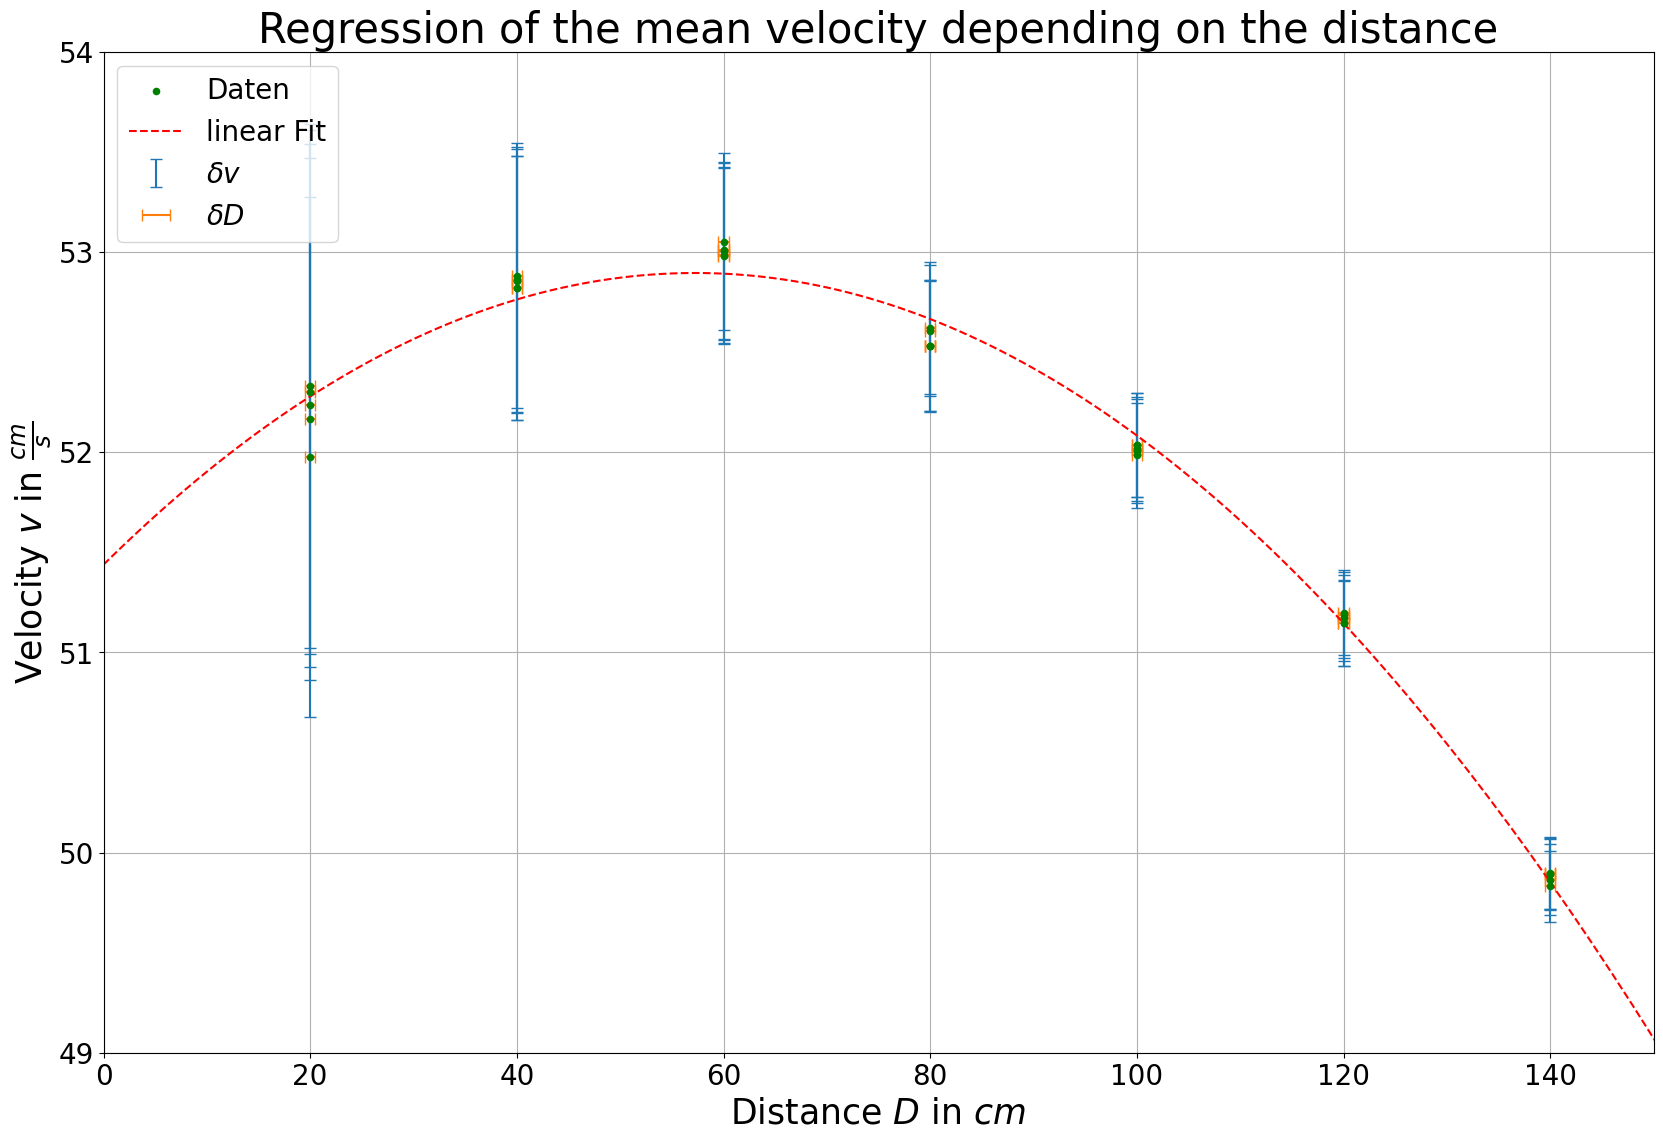

51.438+/-0.005


In [ ]:
#Plot Velocity/Distance for MeanSpeed
distance_array_value = np.array([])
for i in range(len(uMeanSpeed)):
      distance_array_value = np.append(distance_array_value, uMeanSpeed[i,0].nominal_value)

velocity_array_value = np.array([])
for i in range(len(uMeanSpeed)):
      velocity_array_value = np.append(velocity_array_value, uMeanSpeed[i,2].nominal_value)

distance_array_error = np.array([])
for i in range(len(uMeanSpeed)):
      distance_array_error = np.append(distance_array_error, uMeanSpeed[i,0].std_dev)

velocity_array_error = np.array([])
for i in range(len(uMeanSpeed)):
      velocity_array_error = np.append(velocity_array_error, uMeanSpeed[i,2].std_dev)

def objective(x, a, b, c):
 return a * x + b * x**2 + c

fig, axs = plt.subplots(1,1,figsize=(20, 13));
plt.scatter(distance_array_value, velocity_array_value, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(distance_array_value,velocity_array_value,yerr = velocity_array_error,linestyle='none',capsize = 4, label = r'$δv$');
axs.errorbar(distance_array_value,velocity_array_value,xerr = distance_array_error,linestyle='none',capsize = 4, label = r'$δD$');
#c.optimize.curve_fit(objective, distance_array_value, velocity_array_value, absolute_sigma=True)
popt, pcov = sc.optimize.curve_fit(objective, distance_array_value, velocity_array_value)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
x_line = arange(0, 200)
y_line = objective(x_line, a, b, c)
perr = np.diag(pcov)
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')

print('\n')


axs.set_xlabel(r'Distance $D$ in $cm$', fontsize = 25);
axs.set_ylabel(r'Velocity $v$ in $\frac{cm}{s}$', fontsize = 25);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

axs.legend(loc = 'upper left',fontsize=20)

plt.title(r'Regression of the mean velocity depending on the distance', fontsize = 30)
plt.grid()

plt.axis([0, 150, 49, 54]) #Achsenanpassung
plt.show()

c = ufloat(c, perr[2])
print(c)

In [ ]:
# Calculate acceleration and gravitationalforce
a = c**(2)/(2*(Centerpoint - length_messurement))
print(a)
g = a / angle
print(g)
print(g/100)

12.9066+/-0.0024
820+/-17
8.20+/-0.17


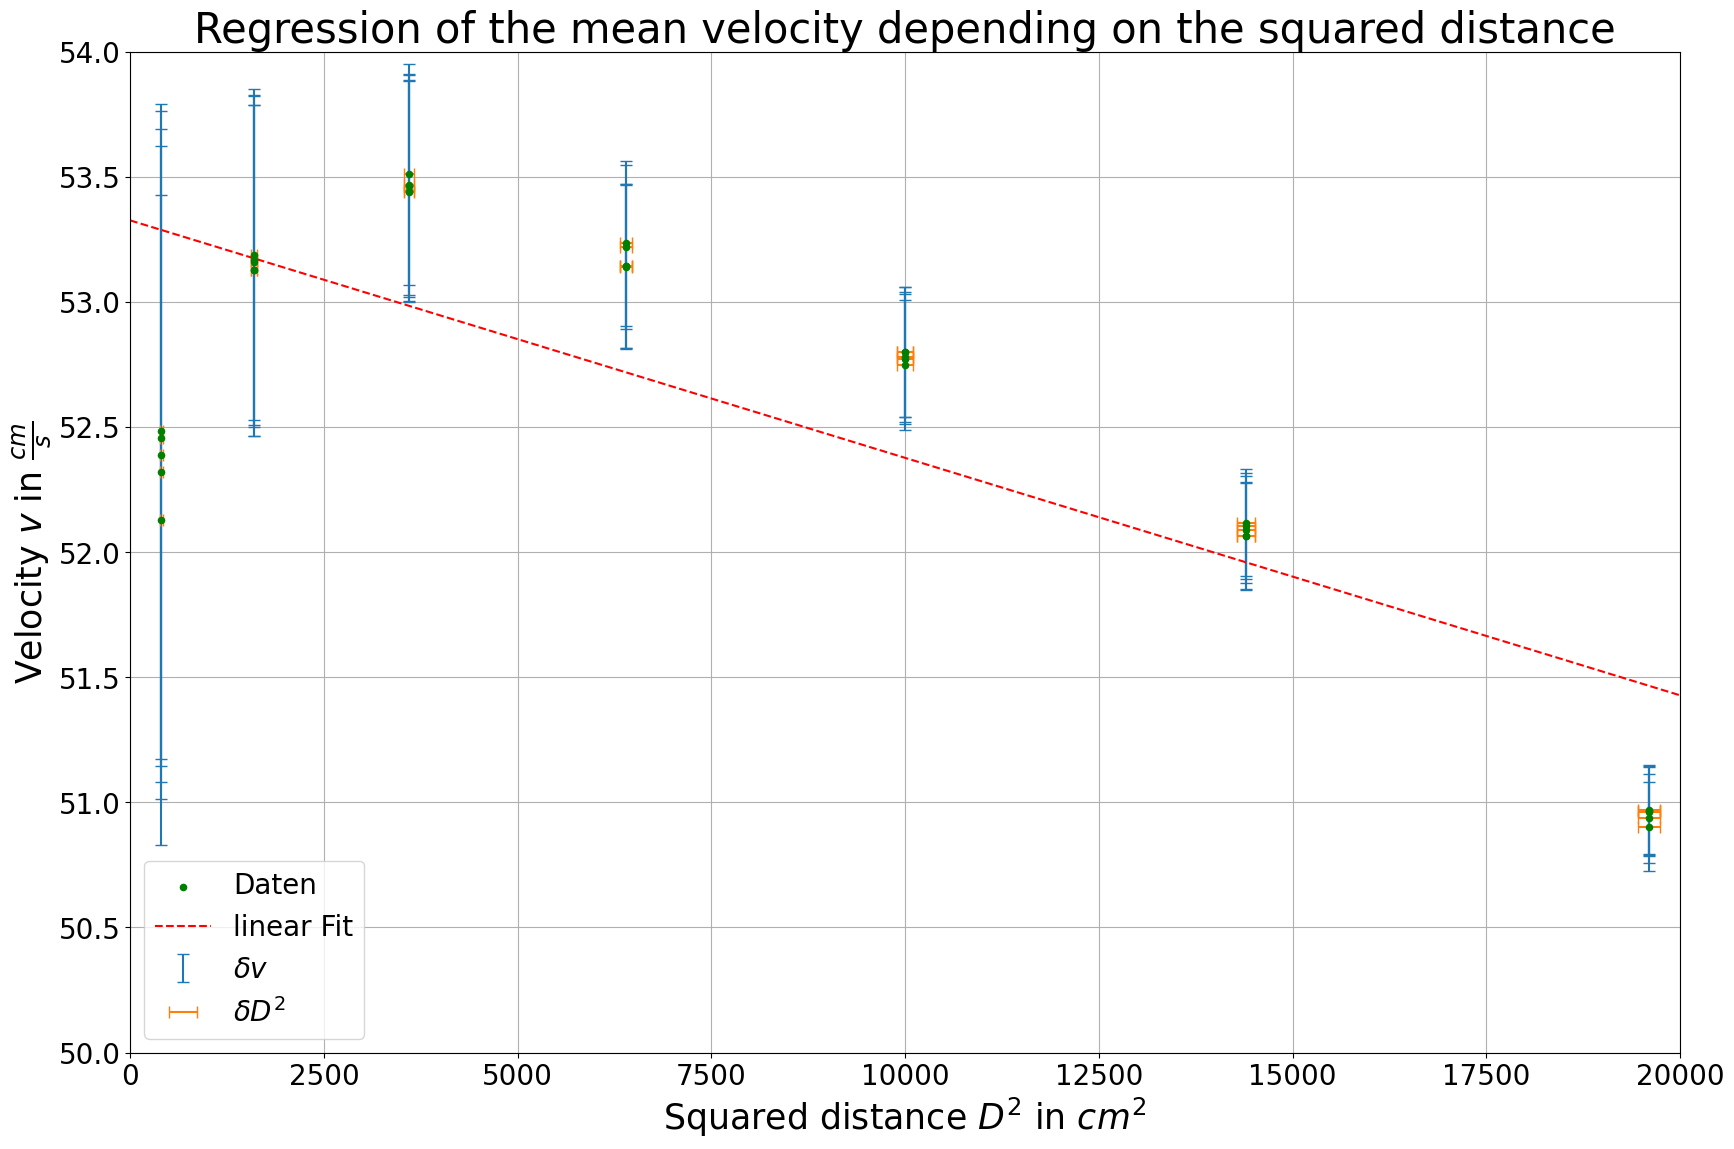

53.325+/-0.019


In [ ]:
#Calculate Velocity for MeanSpeed
append_array = np.array([])
for i in range(len(uMeanSpeed)):
  append_array = np.append(append_array, (uMeanSpeed[i,0])**2)

uMeanSpeed = np.concatenate((uMeanSpeed,append_array[:,None]),axis=1)
#Plot Velocity/Distance for MeanSpeed
distance_array_value = np.array([])
for i in range(len(uMeanSpeed)):
      distance_array_value = np.append(distance_array_value, uMeanSpeed[i,3].nominal_value)

velocity_array_value = np.array([])
for i in range(len(uMeanSpeed)):
      velocity_array_value = np.append(velocity_array_value, uMeanSpeed[i,2].nominal_value+(Friction_coeficiant/weight_cart.nominal_value)*uMeanSpeed[i,0].nominal_value)

distance_array_error = np.array([])
for i in range(len(uMeanSpeed)):
      distance_array_error = np.append(distance_array_error, uMeanSpeed[i,3].std_dev)

velocity_array_error = np.array([])
for i in range(len(uMeanSpeed)):
      velocity_array_error = np.append(velocity_array_error, uMeanSpeed[i,2].std_dev)

def linF(x, a,b):
    return a*x + b

fig, axs = plt.subplots(1,1,figsize=(20, 13));
plt.scatter(distance_array_value, velocity_array_value, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(distance_array_value,velocity_array_value,yerr = velocity_array_error,linestyle='none',capsize = 4, label = r'$δv$');
axs.errorbar(distance_array_value,velocity_array_value,xerr = distance_array_error,linestyle='none',capsize = 4, label = r'$δD^2$');
#c.optimize.curve_fit(objective, distance_array_value, velocity_array_value, absolute_sigma=True)
popt, pcov = sc.optimize.curve_fit(linF, distance_array_value, velocity_array_value)
a, b = popt
x_line = arange(0, 20000)
y_line = linF(x_line, a, b)
perr = np.diag(pcov)
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')

print('\n')


axs.set_xlabel(r'Squared distance $D^2$ in $cm^2$', fontsize = 25);
axs.set_ylabel(r'Velocity $v$ in $\frac{cm}{s}$', fontsize = 25);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

axs.legend(loc = 'upper left',fontsize=20)

plt.title(r'Regression of the mean velocity depending on the squared distance', fontsize = 30)
plt.grid()
plt.legend(loc='lower left', fontsize=20)

plt.axis([0, 20000, 50, 54]) #Achsenanpassung
plt.show()

b1 = ufloat(b, perr[1])
print(b1)

In [ ]:
#Calculate ugly Formula for MeanSpeed

append_array = np.array([])
for i in range(len(uMeanSpeed)):
  append_array = np.append(append_array, 0.5*(unp.sqrt(1+uMeanSpeed[i,0]/(2*Centerpoint- length_messurement)) + unp.sqrt(1-uMeanSpeed[i,0]/(2*Centerpoint -length_messurement))))

uMeanSpeed = np.concatenate((uMeanSpeed,append_array[:,None]),axis=1)

46+/-12




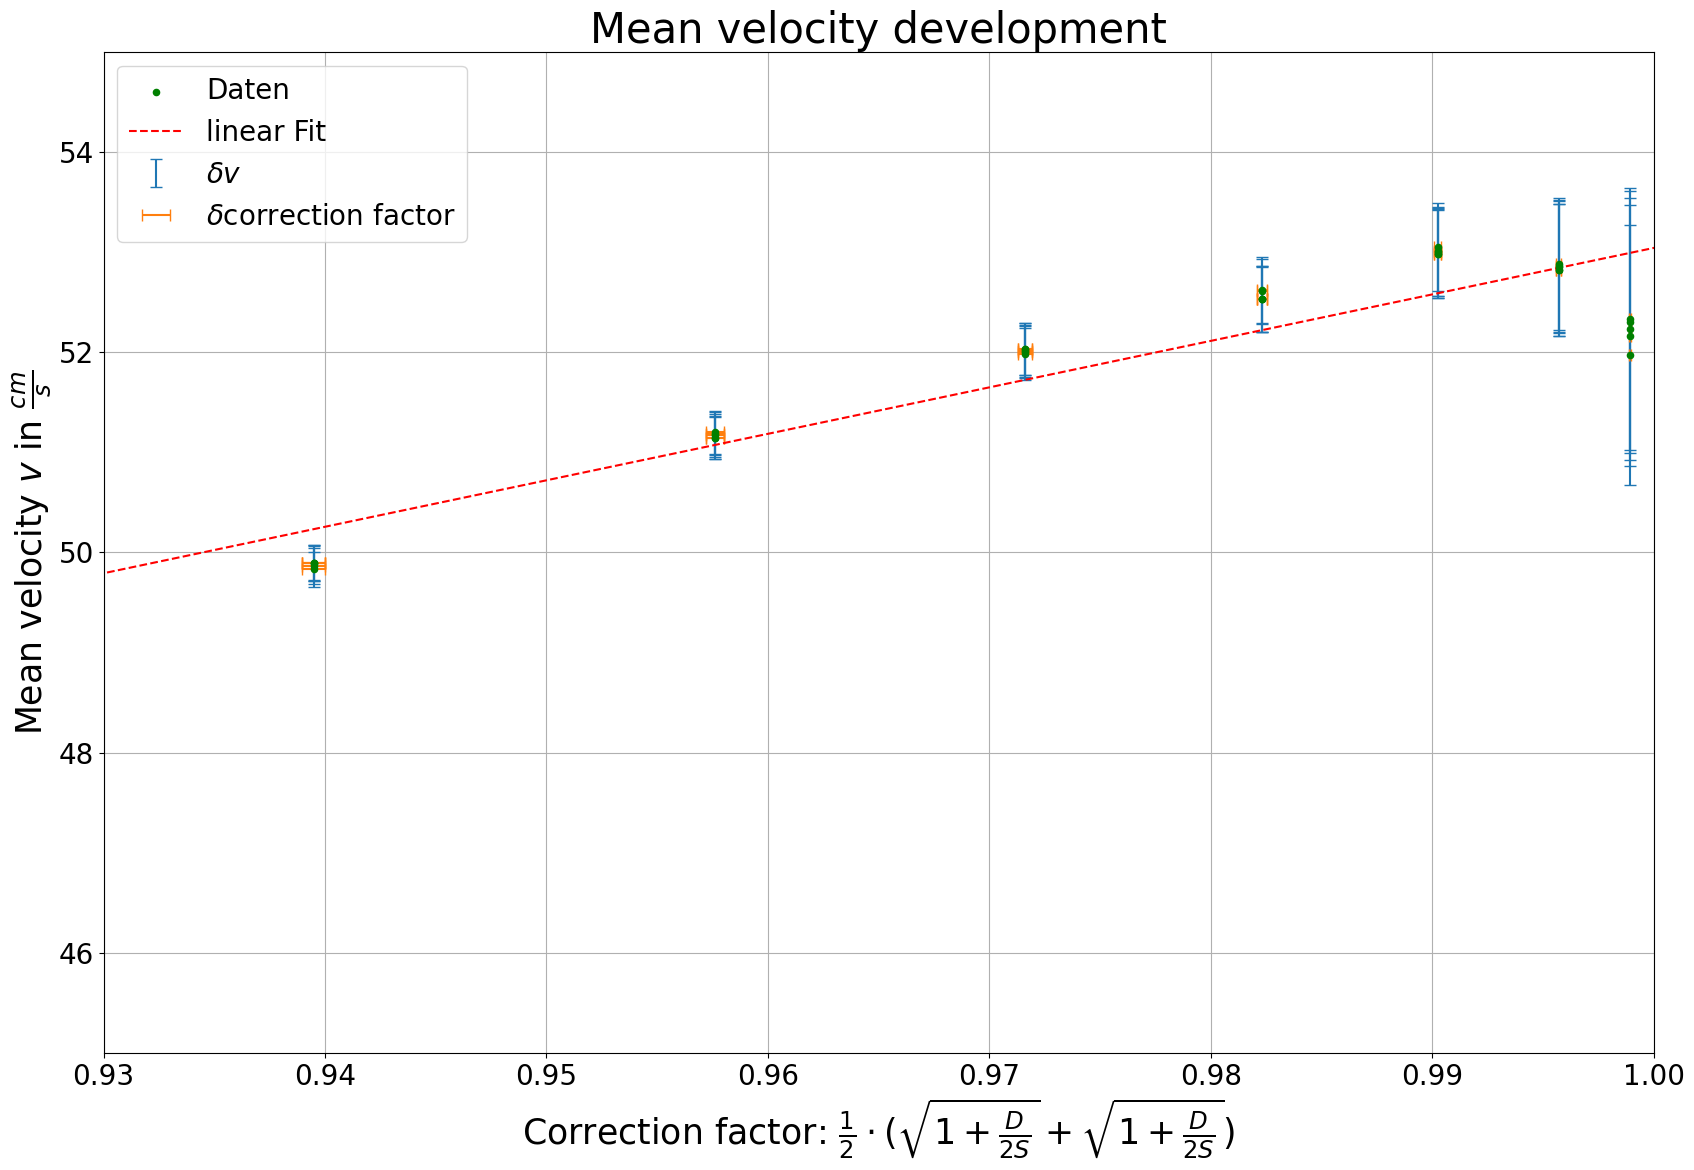

In [ ]:
# Plot ugly Formula
x_array_value = np.array([])
for i in range(len(uMeanSpeed)):
      x_array_value = np.append(x_array_value, uMeanSpeed[i,4].nominal_value)

y0_array_value = np.array([])
for i in range(len(uMeanSpeed)):
      y0_array_value = np.append(y0_array_value, uMeanSpeed[i,2].nominal_value)

x_array_error = np.array([])
for i in range(len(uMeanSpeed)):
      x_array_error = np.append(x_array_error, uMeanSpeed[i,4].std_dev)

y0_array_error = np.array([])
for i in range(len(uMeanSpeed)):
      y0_array_error = np.append(y0_array_error, uMeanSpeed[i,2].std_dev)

def linF(x, a,b):
    return a*x + b

fig, axs = plt.subplots(1,1,figsize=(20, 13));
plt.scatter(x_array_value, y0_array_value, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(x_array_value,y0_array_value,yerr = y0_array_error,linestyle='none',capsize = 4, label = r'$δv$');
axs.errorbar(x_array_value,y0_array_value,xerr = x_array_error,linestyle='none',capsize = 4, label = r'$δ$correction factor');
sc.optimize.curve_fit(linF, x_array_value, y0_array_value, absolute_sigma=True)
popt, pcov = sc.optimize.curve_fit(linF, x_array_value, y0_array_value)
a, b = popt
x_line = arange(0, 4000000 + 1)
y_line = linF(x_line, a, b)
perr = np.diag(pcov)
a1 = ufloat(a, perr[0])
b1 = ufloat(b, perr[1])
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')

print(a1)

print('\n')


axs.set_xlabel(r'Correction factor: $\frac{1}{2}\cdot(\sqrt{1+\frac{D}{2S}}+\sqrt{1+\frac{D}{2S}})$', fontsize = 25);
axs.set_ylabel(r'Mean velocity $v$ in $\frac{cm}{s}$', fontsize = 25);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

axs.legend(loc = 'upper left',fontsize=20)

plt.title(r'Mean velocity development', fontsize = 30)
plt.grid()

plt.axis([0.93, 1, 45, 55]) #Achsenanpassung
plt.show()

In [ ]:
# Calculate acceleration and gravitationalforce for checkSpeed values
checkSpeed_mean_v = np.mean(uCheckSpeed)
print(checkSpeed_mean_v)
a = checkSpeed_mean_v**(2)/(2*(Centerpoint - length_messurement))
print(a)
g = a / angle
print(g)
print(g/100)

56.22+/-0.25
15.42+/-0.14
979+/-22
9.79+/-0.22


In [ ]:
#Calculate Acceleration for directSpeed
append_array = np.array([])
for i in range(len(uDirectSpeed)):
  append_array = np.append(append_array, ((uDirectSpeed[i,4]+(Friction_coeficiant/weight_cart)*uDirectSpeed[i,2])**(2) - (uDirectSpeed[i,3])**2) /(2*uDirectSpeed[i,2]))

uDirectSpeed = np.concatenate((uDirectSpeed,append_array[:,None]),axis=1)

#Calculate mean of accelerations
calculate_mean = np.array([])
for i in range(len(uDirectSpeed)):
  calculate_mean = np.append(calculate_mean, uDirectSpeed[i, 5])

mean_acceleration = np.mean(calculate_mean)

#Calculate Gravitationalforce

print(uDirectSpeed)
print(mean_acceleration)
g = mean_acceleration / angle
print(g)
print(g/100)


[[60.0+/-0 140.0+/-0 80.0+/-0.5 39.0+/-0.3 63.2+/-0.3
  15.943766243231991+/-0.29662881096560406]
 [60.0+/-0 140.0+/-0 80.0+/-0.5 39.0+/-0.3 62.8+/-0.3
  15.62570501874219+/-0.2947820622377242]
 [60.0+/-0 140.0+/-0 80.0+/-0.5 38.7+/-0.3 62.8+/-0.3
  15.771392518742186+/-0.29451964632060135]
 [60.0+/-0 140.0+/-0 80.0+/-0.5 39.0+/-0.3 62.8+/-0.3
  15.62570501874219+/-0.2947820622377242]
 [60.0+/-0 140.0+/-0 80.0+/-0.5 38.9+/-0.3 62.8+/-0.3
  15.67439251874219+/-0.29469407810690385]
 [60.0+/-0 140.0+/-0 80.0+/-0.5 38.9+/-0.3 62.8+/-0.3
  15.67439251874219+/-0.29469407810690385]]
15.72+/-0.12
998+/-22
9.98+/-0.22


In [ ]:
#Elastic collision calculations
uImpulse1 = uImpulse[0:9]
#Calculate center of gravity velocity before collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, 1/(uImpulse1[i,4] + weight_cart_rubber + weight_cart_bumper) * ((weight_cart_rubber + uImpulse1[i,4]) * uImpulse1[i,0] - (weight_cart_bumper) * uImpulse1[i,2]))

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate center of gravity velocity after collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, 1/(uImpulse1[i,4] + weight_cart_rubber + weight_cart_bumper) * (-(weight_cart_rubber + uImpulse1[i,4]) * uImpulse1[i,1] + (weight_cart_bumper) * uImpulse1[i,3]))

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate center of gravity velocity before collision minus after collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, uImpulse1[i,5] - uImpulse1[i,6])

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate mean of the difference
calculate_mean = np.array([])
for i in range(len(uImpulse1)):
  calculate_mean = np.append(calculate_mean, uImpulse1[i, 7])

mean = np.mean(calculate_mean)
print("Wie viel von der Schwerkraftgeschwindigkeit verlohren geht : ", mean)

#Calculate relativ velocities before collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, uImpulse1[i,0] + uImpulse1[i,2])

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate relativ velocities after collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, uImpulse1[i,1] + uImpulse1[i,3])

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate kinetic Engerie before collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, 0.5*(weight_cart_rubber + uImpulse1[i,4]) * (uImpulse1[i,0])**(2) + 0.5*(weight_cart_bumper) * (uImpulse1[i,2])**(2))

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate kinetic Engerie after collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, 0.5*(weight_cart_rubber + uImpulse1[i,4]) * (uImpulse1[i,1])**(2) + 0.5*(weight_cart_bumper) * (uImpulse1[i,3])**(2))

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate kinetic Engerie after collision / kinetic Engerie before collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, uImpulse1[i,11] / uImpulse1[i,10] )

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate mean of the Energie conservation
calculate_mean = np.array([])
for i in range(len(uImpulse1)):
  calculate_mean = np.append(calculate_mean, uImpulse1[i, 12])

mean = np.mean(calculate_mean)
print("Prozentuale Energieerhaltung : " , mean)

Wie viel von der Schwerkraftgeschwindigkeit verlohren geht :  0.56+/-0.19
Prozentuale Energieerhaltung :  0.882+/-0.007


In [ ]:
#Inelastic collision calculations
uImpulse1 = uImpulse[11:21]

#Calculate center of gravity velocity before collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, 1/(uImpulse1[i,4] + weight_cart_rubber + weight_cart_bumper) * ((weight_cart_rubber) * uImpulse1[i,0] - (weight_cart_bumper + uImpulse1[i,4]) * uImpulse1[i,2]))

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate center of gravity velocity before collision minus after collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, uImpulse1[i,5] + uImpulse1[i,1])

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate mean of the difference
calculate_mean = np.array([])
for i in range(len(uImpulse1)):
  calculate_mean = np.append(calculate_mean, uImpulse1[i, 6])

mean = np.mean(calculate_mean)
print("Wie viel von der Schwerkraftgeschwindigkeit verlohren geht : ", mean)

#Calculate kinetic Engerie before collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, 0.5*(weight_cart_rubber) * (uImpulse1[i,0])**(2) + 0.5*(weight_cart_bumper + uImpulse1[i,4]) * (uImpulse1[i,2])**(2))

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate kinetic Engerie after collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, 0.5*(weight_cart_rubber + uImpulse1[i,4] + weight_cart_bumper) * (uImpulse1[i,1])**(2))

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate kinetic Engerie after collision / kinetic Engerie before collision
append_array = np.array([])
for i in range(len(uImpulse1)):
    append_array = np.append(append_array, uImpulse1[i,8] / uImpulse1[i,7] )

uImpulse1 = np.concatenate((uImpulse1 ,append_array[:,None]),axis=1)

#Calculate mean of the Energie conservation
calculate_mean = np.array([])
for i in range(len(uImpulse1)):
  calculate_mean = np.append(calculate_mean, uImpulse1[i, 9])

mean = np.mean(calculate_mean)
print("Prozentuale Energieerhaltung : " , mean)

Wie viel von der Schwerkraftgeschwindigkeit verlohren geht :  -0.77+/-0.17
Prozentuale Energieerhaltung :  0.1490+/-0.0019


In [ ]:
uMeanSpeed140 = uMeanSpeed[0:5]
uMeanSpeed120 = uMeanSpeed[5:10]
uMeanSpeed100 = uMeanSpeed[10:15]
uMeanSpeed80 = uMeanSpeed[15:20]
uMeanSpeed60 = uMeanSpeed[20:25]
uMeanSpeed40 = uMeanSpeed[25:30]
uMeanSpeed20 = uMeanSpeed[30:35]

def calculate_mean(array, index):
  calculate_mean = np.array([])
  for i in range(len(array)):
    calculate_mean = np.append(calculate_mean, array[i, index])

  mean = np.mean(calculate_mean)
  return mean

print("mean140:", calculate_mean(uMeanSpeed140, 2))
print("mean120:", calculate_mean(uMeanSpeed120, 2))
print("mean100:", calculate_mean(uMeanSpeed100, 2))
print("mean80:", calculate_mean(uMeanSpeed80, 2))
print("mean60:", calculate_mean(uMeanSpeed60, 2))
print("mean40:", calculate_mean(uMeanSpeed40, 2))
print("mean20:", calculate_mean(uMeanSpeed20, 2))

mean140: 49.88+/-0.08
mean120: 51.17+/-0.10
mean100: 52.01+/-0.12
mean80: 52.56+/-0.15
mean60: 53.01+/-0.20
mean40: 52.85+/-0.30
mean20: 52.2+/-0.6
